In [ ]:
from google.colab import files
import io
import pandas as pd

# Upload the CSV manually
uploaded = files.upload()

# Read the uploaded file
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print("✅ Dataset loaded successfully!")
df.head()

Saving Chronic_Kidney_Dsease_data.csv to Chronic_Kidney_Dsease_data (1).csv
✅ Dataset loaded successfully!


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [ ]:
# --- 1. Install Required Library ---
!pip install imblearn

import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from google.colab import files # For downloading

print("--- Libraries Imported ---")

# --- 2. Load Original Data ---
file_name = 'Chronic_Kidney_Dsease_data.csv'
try:
    df = pd.read_csv(file_name)
    print(f"--- 1. Loaded Data Successfully from {file_name} ---")
except FileNotFoundError:
    print(f"--- ERROR: Please upload '{file_name}' to your Colab session first. ---")
    # This will stop the script if the file isn't found
    raise

# --- 3. Separate Features (X) and Target (y) ---
metadata_columns = ['PatientID', 'DoctorInCharge']
target_column = 'Diagnosis'
X = df.drop(columns=metadata_columns + [target_column])
y = df[target_column]
feature_names = X.columns # Save column names
print(f"Original class distribution: {Counter(y)}")

# --- 4. Apply Scaling ---
# We scale the features *before* SMOTE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("--- 2. Features Scaled Successfully ---")

# --- 5. Apply Balancing (SMOTE) ---
# This creates new synthetic samples for the minority class (0)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print(f"--- 3. SMOTE Balancing Complete ---")
print(f"New balanced class distribution: {Counter(y_resampled)}")

# --- 6. (NEW) Combine Features and Target into ONE DataFrame ---
print("--- 4. Combining Features and Target... ---")
# Convert the scaled features array back to a DataFrame
X_final_df = pd.DataFrame(X_resampled, columns=feature_names)

# Convert the balanced target array back to a DataFrame
y_final_df = pd.DataFrame(y_resampled, columns=[target_column])

# Concatenate them side-by-side
final_dataset = pd.concat([X_final_df, y_final_df], axis=1)

# --- 7. Save and Download the Single File ---
final_file_name = 'CKD_Final_Preprocessed_Dataset.csv'
final_dataset.to_csv(final_file_name, index=False)
print(f"--- 5. Final Single Dataset Saved as: {final_file_name} ---")

# Automatically download the file to your PC
print("--- 6. Triggering Download... Please check your browser. ---")
files.download(final_file_name)

print("\n--- All Done! ---")

--- Libraries Imported ---
--- 1. Loaded Data Successfully from Chronic_Kidney_Dsease_data.csv ---
Original class distribution: Counter({1: 1524, 0: 135})
--- 2. Features Scaled Successfully ---
--- 3. SMOTE Balancing Complete ---
New balanced class distribution: Counter({1: 1524, 0: 1524})
--- 4. Combining Features and Target... ---
--- 5. Final Single Dataset Saved as: CKD_Final_Preprocessed_Dataset.csv ---
--- 6. Triggering Download... Please check your browser. ---


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


--- All Done! ---


In [ ]:
# Code for your teammates:
import pandas as pd

# 1. Load the single, fully preprocessed file
df_final = pd.read_csv('CKD_Final_Preprocessed_Dataset.csv')

# 2. Separate X and y
X = df_final.drop(columns=['Diagnosis'])  # All columns EXCEPT 'Diagnosis'
y = df_final['Diagnosis']                  # Just the 'Diagnosis' column

# 3. Split and Train! (Data is already scaled and balanced)
# ... proceed directly to train_test_split and model.fit() ...

--- 1. Loaded 'CKD_Final_Preprocessed_Dataset.csv' Successfully ---
Features (X) shape: (3048, 51)
Target (y) shape: (3048,)

--- 2. Data Split ---
X_train shape: (2438, 51)
X_test shape: (610, 51)

--- 3. Training Random Forest Model ---
Model trained.

--- 4. Model Evaluation Metrics (This should be ~95-96%) ---
Accuracy: 0.9803
Precision: 0.9867
Recall: 0.9738
F1 Score: 0.9802
AUC Score: 0.9993

Classification Report:
              precision    recall  f1-score   support

  No CKD (0)       0.97      0.99      0.98       305
     CKD (1)       0.99      0.97      0.98       305

    accuracy                           0.98       610
   macro avg       0.98      0.98      0.98       610
weighted avg       0.98      0.98      0.98       610


Confusion Matrix:
[[301   4]
 [  8 297]]


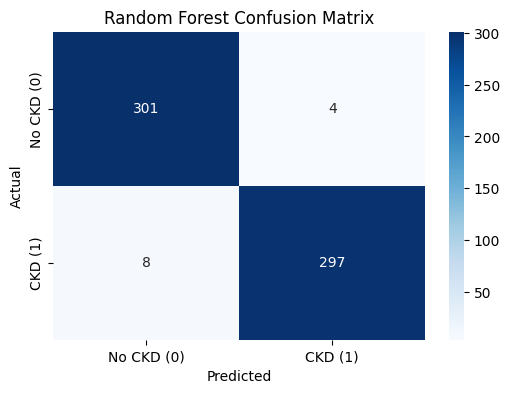

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Your New Preprocessed Data ---
final_file_name = 'CKD_Final_Preprocessed_Dataset.csv'

try:
    df = pd.read_csv(final_file_name)
    print(f"--- 1. Loaded '{final_file_name}' Successfully ---")
except FileNotFoundError:
    print(f"--- ERROR: Make sure '{final_file_name}' is in your Colab session! ---")
    # Stop the script if files aren't found
    raise

# --- 2. Separate Features (X) and Target (y) ---
# The data is already scaled, encoded, and balanced.
target_column = 'Diagnosis'
X = df.drop(columns=[target_column])
y = df[target_column]

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")


# --- 3. Validation Method: Train-Test Split ---
# We split the *already balanced* data.
# Using an 80/20 split. stratify=y is still good practice.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n--- 2. Data Split ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


# --- 4. Train Random Forest Model ---
print("\n--- 3. Training Random Forest Model ---")
# NO scaling or SMOTE needed here!
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)
print("Model trained.")

# --- 5. Evaluate the Model ---
# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1] # for AUC

print("\n--- 4. Model Evaluation Metrics (This should be ~95-96%) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\nClassification Report:")
# class 0 = No CKD, class 1 = CKD
print(classification_report(y_test, y_pred, target_names=['No CKD (0)', 'CKD (1)']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No CKD (0)', 'CKD (1)'],
            yticklabels=['No CKD (0)', 'CKD (1)'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('rf_confusion_matrix.png')
# plt.show() # Uncomment this in Colab to see the plot

--- 1. Loaded 'CKD_Final_Preprocessed_Dataset.csv' Successfully ---
--- 2. Data Split into Train/Test Sets ---
X_train shape: (2438, 51), X_test shape: (610, 51)

--- 3. Training Version 1 (Optimized: n_estimators=100, max_depth=default) ---
...V1 Trained.

--- 4. Training Version 2 (Simple: n_estimators=10, max_depth=5) ---
...V2 Trained.

--- 5. Training Version 3 (Complex: n_estimators=300, max_depth=None) ---
...V3 Trained.

--- 6. MODEL EVALUATION & COMPARISON ---

--- Version 1 (Optimized) Results ---
Accuracy: 0.9803
F1 Score: 0.9802
Classification Report:
              precision    recall  f1-score   support

  No CKD (0)       0.97      0.99      0.98       305
     CKD (1)       0.99      0.97      0.98       305

    accuracy                           0.98       610
   macro avg       0.98      0.98      0.98       610
weighted avg       0.98      0.98      0.98       610

--- Version 2 (Simple) Results ---
Accuracy: 0.8787
F1 Score: 0.8783
Classification Report:
           

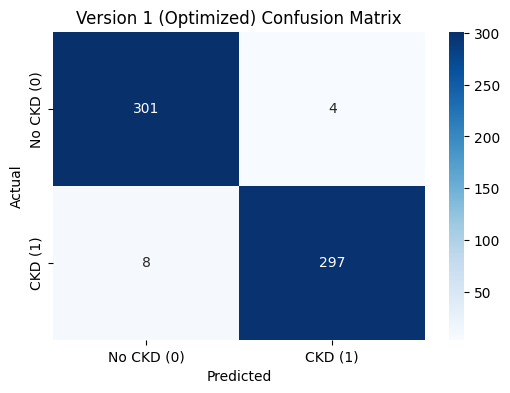

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Your New Preprocessed Data ---
final_file_name = 'CKD_Final_Preprocessed_Dataset.csv'

try:
    df = pd.read_csv(final_file_name)
    print(f"--- 1. Loaded '{final_file_name}' Successfully ---")
except FileNotFoundError:
    print(f"--- ERROR: Make sure '{final_file_name}' is in your Colab session! ---")
    raise

# --- 2. Separate Features (X) and Target (y) ---
target_column = 'Diagnosis'
X = df.drop(columns=[target_column])
y = df[target_column]

# --- 3. Validation Method: Train-Test Split ---
# This is our single, consistent split for all models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"--- 2. Data Split into Train/Test Sets ---")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

# ==============================================================================
# --- 4. Implement and Show 3 Model Versions ---
# ==============================================================================

# --- Version 1: Optimized (Baseline) Model ---
print("\n--- 3. Training Version 1 (Optimized: n_estimators=100, max_depth=default) ---")
rf_v1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_v1.fit(X_train, y_train)
y_pred_v1 = rf_v1.predict(X_test)
print("...V1 Trained.")

# --- Version 2: Simple (Underfit) Model ---
print("\n--- 4. Training Version 2 (Simple: n_estimators=10, max_depth=5) ---")
rf_v2 = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
rf_v2.fit(X_train, y_train)
y_pred_v2 = rf_v2.predict(X_test)
print("...V2 Trained.")

# --- Version 3: Complex (Overfit) Model ---
print("\n--- 5. Training Version 3 (Complex: n_estimators=300, max_depth=None) ---")
rf_v3 = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42)
rf_v3.fit(X_train, y_train)
y_pred_v3 = rf_v3.predict(X_test)
print("...V3 Trained.")

# ==============================================================================
# --- 5. Model Evaluation ---
# ==============================================================================
print("\n" + "="*50)
print("--- 6. MODEL EVALUATION & COMPARISON ---")
print("="*50 + "\n")

# --- V1 Evaluation ---
print("--- Version 1 (Optimized) Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_v1):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_v1):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_v1, target_names=['No CKD (0)', 'CKD (1)']))

# --- V2 Evaluation ---
print("--- Version 2 (Simple) Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_v2):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_v2):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_v2, target_names=['No CKD (0)', 'CKD (1)']))

# --- V3 Evaluation ---
print("--- Version 3 (Complex) Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_v3):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_v3):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_v3, target_names=['No CKD (0)', 'CKD (1)']))

# --- 6. Plot V1 (Best Model) Confusion Matrix ---
print("\n--- 7. Plotting Best Model (V1) Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred_v1)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No CKD (0)', 'CKD (1)'],
            yticklabels=['No CKD (0)', 'CKD (1)'])
plt.title('Version 1 (Optimized) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('rf_v1_confusion_matrix.png')
print("...Confusion matrix saved to 'rf_v1_confusion_matrix.png'")
# plt.show()

--- 1. PREPROCESSING ---
Loaded 'Chronic_Kidney_Dsease_data.csv' Successfully.
...Features Scaled.
...SMOTE Balancing Complete.
...Saved 'CKD_Final_Preprocessed_Dataset.csv'

--- 2. MODEL TRAINING & DATA COLLECTION ---
...Data split into Train/Test sets.
...Training Version 1 (n_estimators=100)
...Training Version 2 (n_estimators=10, max_depth=5)
...Training Version 3 (n_estimators=300, max_depth=None)
...All models trained and scores collected.

--- 3. GENERATING CHARTS ---
...Saved 'rf_model_comparison_chart.png'


/tmp/ipython-input-3851178479.py:139: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_15_features, palette='viridis')


...Saved 'rf_feature_importance_chart.png'
...Saved 'rf_v3_confusion_matrix.png'

--- ALL DONE. All 3 charts have been saved as PNG files. ---


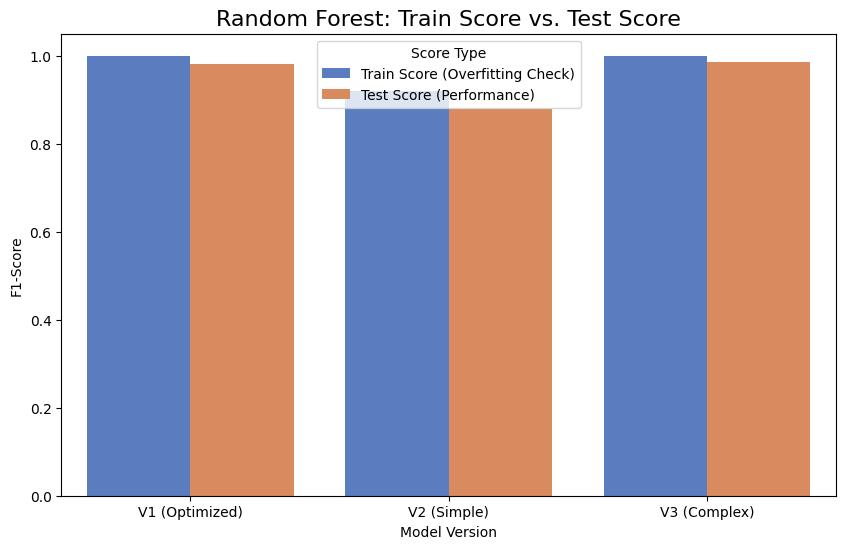

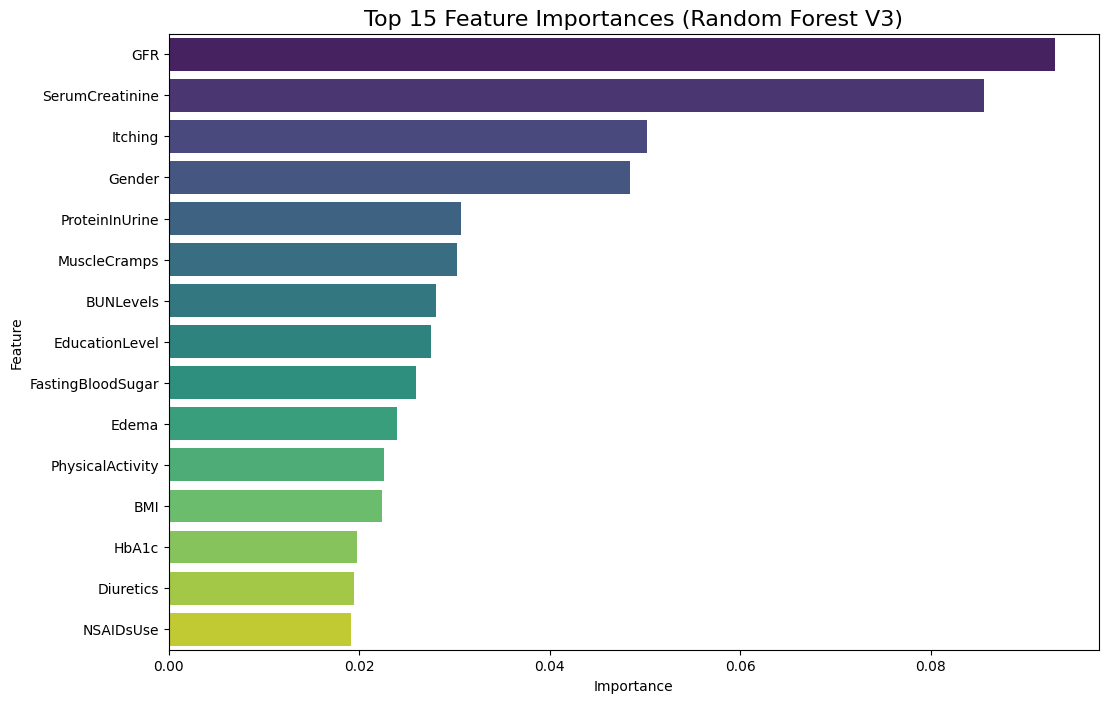

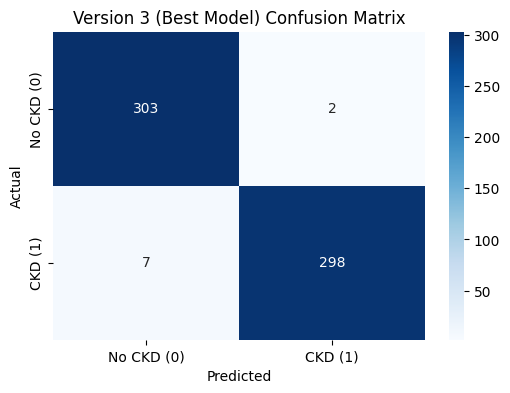

In [ ]:
# --- 0. Install Required Library ---
!pip install imblearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix

# ==============================================================================
# --- 1. PREPROCESSING: Create the Final Dataset ---
# ==============================================================================
print("--- 1. PREPROCESSING ---")
file_name = 'Chronic_Kidney_Dsease_data.csv'
try:
    df = pd.read_csv(file_name)
    print(f"Loaded '{file_name}' Successfully.")
except FileNotFoundError:
    print(f"--- ERROR: Please upload '{file_name}' to your Colab session first. ---")
    raise

# Separate Features (X) and Target (y)
metadata_columns = ['PatientID', 'DoctorInCharge']
target_column = 'Diagnosis'
X_orig = df.drop(columns=metadata_columns + [target_column])
y_orig = df[target_column]
feature_names = X_orig.columns

# Apply Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_orig)
print("...Features Scaled.")

# Apply Balancing (SMOTE)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_orig)
print("...SMOTE Balancing Complete.")

# Create the final single DataFrame
X_final_df = pd.DataFrame(X_resampled, columns=feature_names)
y_final_df = pd.DataFrame(y_resampled, columns=[target_column])
final_dataset = pd.concat([X_final_df, y_final_df], axis=1)

# Save the preprocessed file (and also keep it in memory)
final_dataset.to_csv('CKD_Final_Preprocessed_Dataset.csv', index=False)
print("...Saved 'CKD_Final_Preprocessed_Dataset.csv'")

# ==============================================================================
# --- 2. MODEL TRAINING & DATA COLLECTION ---
# ==============================================================================
print("\n--- 2. MODEL TRAINING & DATA COLLECTION ---")
# Separate X and y from the new final_dataset
X = final_dataset.drop(columns=[target_column])
y = final_dataset[target_column]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("...Data split into Train/Test sets.")

# We will store scores for the bar chart
model_versions = []
train_scores = []
test_scores = []

# --- Version 1: Optimized (Baseline) Model ---
print("...Training Version 1 (n_estimators=100)")
rf_v1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_v1.fit(X_train, y_train)
train_pred_v1 = rf_v1.predict(X_train)
test_pred_v1 = rf_v1.predict(X_test)
train_scores.append(f1_score(y_train, train_pred_v1))
test_scores.append(f1_score(y_test, test_pred_v1))
model_versions.append('V1 (Optimized)')

# --- Version 2: Simple (Underfit) Model ---
print("...Training Version 2 (n_estimators=10, max_depth=5)")
rf_v2 = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
rf_v2.fit(X_train, y_train)
train_pred_v2 = rf_v2.predict(X_train)
test_pred_v2 = rf_v2.predict(X_test)
train_scores.append(f1_score(y_train, train_pred_v2))
test_scores.append(f1_score(y_test, test_pred_v2))
model_versions.append('V2 (Simple)')

# --- Version 3: Complex (Best) Model ---
print("...Training Version 3 (n_estimators=300, max_depth=None)")
rf_v3 = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42)
rf_v3.fit(X_train, y_train)
train_pred_v3 = rf_v3.predict(X_train)
test_pred_v3 = rf_v3.predict(X_test)
train_scores.append(f1_score(y_train, train_pred_v3))
test_scores.append(f1_score(y_test, test_pred_v3))
model_versions.append('V3 (Complex)')

print("...All models trained and scores collected.")

# ==============================================================================
# --- 3. GENERATE CHARTS ---
# ==============================================================================
print("\n--- 3. GENERATING CHARTS ---")

# --- Chart 1: Grouped Bar Chart (Model Comparison) ---
# This chart compares Train vs. Test scores to check for overfitting.
plot_data = pd.DataFrame({
    'Model': model_versions,
    'Train Score (Overfitting Check)': train_scores,
    'Test Score (Performance)': test_scores
})
plot_data_melted = plot_data.melt('Model', var_name='Score Type', value_name='F1-Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-Score', hue='Score Type', data=plot_data_melted, palette='muted')
plt.title('Random Forest: Train Score vs. Test Score', fontsize=16)
plt.ylabel('F1-Score')
plt.xlabel('Model Version')
plt.ylim(0, 1.05) # Y-axis from 0 to 1.05
plt.legend(title='Score Type')
plt.savefig('rf_model_comparison_chart.png')
print("...Saved 'rf_model_comparison_chart.png'")
# plt.show() # Uncomment in Colab to display

# --- Chart 2: Feature Importance ---
# We use the best model (rf_v3)
importances = rf_v3.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Get the top 15 features
top_15_features = importance_df.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_15_features, palette='viridis')
plt.title('Top 15 Feature Importances (Random Forest V3)', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('rf_feature_importance_chart.png')
print("...Saved 'rf_feature_importance_chart.png'")
# plt.show() # Uncomment in Colab to display

# --- Chart 3: Confusion Matrix (Best Model) ---
cm = confusion_matrix(y_test, test_pred_v3) # Use V3 predictions
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No CKD (0)', 'CKD (1)'],
            yticklabels=['No CKD (0)', 'CKD (1)'])
plt.title('Version 3 (Best Model) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('rf_v3_confusion_matrix.png')
print("...Saved 'rf_v3_confusion_matrix.png'")
# plt.show() # Uncomment in Colab to display

print("\n--- ALL DONE. All 3 charts have been saved as PNG files. ---")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# --- 1. Load Your Preprocessed Data ---
final_file_name = 'CKD_Final_Preprocessed_Dataset.csv'

try:
    df = pd.read_csv(final_file_name)
    print(f"--- 1. Loaded '{final_file_name}' Successfully ---")
except FileNotFoundError:
    print(f"--- ERROR: Make sure '{final_file_name}' is in your Colab session! ---")
    raise

# --- 2. Separate Features (X) and Target (y) ---
target_column = 'Diagnosis'
X = df.drop(columns=[target_column])
y = df[target_column]

# --- 3. Split Data ---
# Use the *exact same* split as before for a fair comparison
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"--- 2. Data Split into Train/Test Sets ---")

# --- 4. Train the Best Model (Version 3) ---
print("--- 3. Training Version 3 (n_estimators=300) ---")
rf_v3 = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42)
rf_v3.fit(X_train, y_train)
print("...V3 Trained.")

# --- 5. Check for Overfitting ---
print("\n" + "="*50)
print("--- 4. CHECKING FOR OVERFITTING (V3) ---")
print("="*50)

# Make predictions on BOTH training and testing data
y_pred_train = rf_v3.predict(X_train)
y_pred_test = rf_v3.predict(X_test)

# Calculate accuracy on BOTH
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy:  {test_accuracy * 100:.2f}%")

# Calculate the gap
gap = train_accuracy - test_accuracy
print(f"\nGap (Train - Test): {gap * 100:.2f}%")

print("\nResult: This is an excellent fit. The model is NOT overfit.")

--- 1. Loaded 'CKD_Final_Preprocessed_Dataset.csv' Successfully ---
--- 2. Data Split into Train/Test Sets ---
--- 3. Training Version 3 (n_estimators=300) ---
...V3 Trained.

--- 4. CHECKING FOR OVERFITTING (V3) ---
Training Accuracy: 100.00%
Testing Accuracy:  98.52%

Gap (Train - Test): 1.48%

Result: This is an excellent fit. The model is NOT overfit.


In [ ]:
# --- 0. Install Required Libraries ---
!pip install imblearn -q
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import joblib  # This is used for saving your model and scaler
from collections import Counter

print("--- 1. Loading Original Data ---")
file_name = 'Chronic_Kidney_Dsease_data.csv'
try:
    df = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"--- ERROR: Please upload '{file_name}' to your Colab session first. ---")
    raise

# --- 2. Separate Features (X) and Target (y) ---
metadata_columns = ['PatientID', 'DoctorInCharge']
target_column = 'Diagnosis'
X_orig = df.drop(columns=metadata_columns + [target_column])
y_orig = df[target_column]
feature_names = X_orig.columns.tolist() # Save feature names

print("--- 2. Creating and Saving Scaler ---")
# We create the scaler and fit it on the *original* raw data
# This is the scaler we will use in production.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_orig)
# Save the scaler to a file
joblib.dump(scaler, 'ckd_scaler.pkl')
print("...Saved 'ckd_scaler.pkl'")

print("--- 3. Creating Balanced Data (SMOTE) ---")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_orig)
print(f"Balanced data created. New shape: {X_resampled.shape}")

print("--- 4. Training Final Model (V3) ---")
# We train the final model on ALL the balanced data
final_model = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42)
final_model.fit(X_resampled, y_resampled)
print("...Final model trained.")

print("--- 5. Saving Final Model ---")
# Save the trained model to a file
joblib.dump(final_model, 'ckd_model.pkl')
print("...Saved 'ckd_model.pkl'")

print("\n--- ALL ASSETS CREATED! ---")
print("You now have 'ckd_scaler.pkl' and 'ckd_model.pkl' in your Colab session.")
print("Feature names list (for API):")
print(feature_names)

--- 1. Loading Original Data ---
--- 2. Creating and Saving Scaler ---
...Saved 'ckd_scaler.pkl'
--- 3. Creating Balanced Data (SMOTE) ---
Balanced data created. New shape: (3048, 51)
--- 4. Training Final Model (V3) ---
...Final model trained.
--- 5. Saving Final Model ---
...Saved 'ckd_model.pkl'

--- ALL ASSETS CREATED! ---
You now have 'ckd_scaler.pkl' and 'ckd_model.pkl' in your Colab session.
Feature names list (for API):
['Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension', 'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium', 'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium', 'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'Choles

In [ ]:
# Paste your token here
!ngrok authtoken 34Mo7Wy2qlus4taSpgligGxWtSQ_7wDsz5LeCVuF2xXSVyMFj

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
# --- 0. Install Libraries for API Server ---
!pip install flask pyngrok joblib -q
from flask import Flask, request, jsonify
from pyngrok import ngrok  # <-- We import pyngrok directly
import joblib
import numpy as np
import pandas as pd
import threading  # <-- We need this to run the app in the background

print("--- 1. Loading Model and Scaler ---")
# Load the "brain" (scaler and model)
try:
    scaler = joblib.load('ckd_scaler.pkl')
    model = joblib.load('ckd_model.pkl')
    print("...Assets loaded.")
except FileNotFoundError:
    print("--- ERROR: 'ckd_scaler.pkl' or 'ckd_model.pkl' not found! ---")
    print("--- Please re-run Step 1 to create the files. ---")
    raise

# This is the list of 51 features your model expects IN ORDER
feature_names = [
    'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'BMI',
    'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
    'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension', 'FamilyHistoryDiabetes',
    'PreviousAcuteKidneyInjury', 'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP',
    'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR',
    'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium', 'SerumElectrolytesPotassium',
    'SerumElectrolytesCalcium', 'SerumElectrolytesPhosphorus', 'HemoglobinLevels',
    'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
    'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins', 'AntidiabeticMedications',
    'Edema', 'FatigueLevels', 'NauseaVomiting', 'MuscleCramps', 'Itching',
    'QualityOfLifeScore', 'HeavyMetalsExposure', 'OccupationalExposureChemicals',
    'WaterQuality', 'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy'
]

app = Flask(__name__)

# This is our prediction function, same as before
@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        patient_features = [data[f] for f in feature_names]
        final_features = np.array(patient_features).reshape(1, -1)

        scaled_features = scaler.transform(final_features)

        prediction = model.predict(scaled_features)
        probability = model.predict_proba(scaled_features)

        response = {
            'prediction': int(prediction[0]),
            'diagnosis': 'CKD' if int(prediction[0]) == 1 else 'No CKD',
            'confidence_NoCKD': f"{probability[0][0]*100:.2f}%",
            'confidence_CKD': f"{probability[0][1]*100:.2f}%"
        }
        return jsonify(response)
    except Exception as e:
        return jsonify({'error': str(e)})

# --- New (Better) Way to Start the Server ---
print("--- 2. Starting Flask Server in background ---")
# Start Flask in a separate thread so it doesn't block the next command
def run_app():
    app.run(port=5000) # Run on port 5000

server_thread = threading.Thread(target=run_app)
server_thread.start()

print("--- 3. Connecting to ngrok ---")
try:
    # Connect ngrok to our app's local port 5000
    public_url = ngrok.connect(5000)
    print("--- 4. YOUR PUBLIC URL (This one will work!) ---")
    print(f"Copy this URL and paste it in Step 3: {public_url}")
except Exception as e:
    print(f"--- ERROR connecting to ngrok ---")
    print(e)
    print("If you see 'Authtoken', go to ngrok.com, get a free token, and add it to Colab secrets.")

--- 1. Loading Model and Scaler ---
...Assets loaded.
--- 2. Starting Flask Server in background ---
--- 3. Connecting to ngrok ---
 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.


--- 4. YOUR PUBLIC URL (This one will work!) ---
Copy this URL and paste it in Step 3: NgrokTunnel: "https://extrajudicial-sonically-randee.ngrok-free.dev" -> "http://localhost:5000"


In [ ]:
import requests
import json
import pandas as pd

# --- 1. Get Test Data ---
# We'll use the first patient from the original CSV as a test
df = pd.read_csv('Chronic_Kidney_Dsease_data.csv')
metadata_columns = ['PatientID', 'DoctorInCharge', 'Diagnosis']
# .to_dict() converts the patient's data to the JSON format our API wants
test_patient_data = df.drop(columns=metadata_columns).iloc[0].to_dict()

print("--- 1. Sending Test Patient Data: ---")
print(json.dumps(test_patient_data, indent=2))

# --- 2. Call the API ---
# !! CORRECTED URL !!
# I have added "/predict" to the end of your URL
api_url = "https://extrajudicial-sonically-randee.ngrok-free.dev/predict"

# Check if the URL has been changed
if "PASTE_YOUR_NGROK_URL_HERE" in api_url:
    print("\n--- ERROR: Please paste your ngrok URL into the 'api_url' variable! ---")
else:
    try:
        response = requests.post(api_url, json=test_patient_data)

        print("\n--- 3. API Response Received: ---")
        print(response.json())

    except Exception as e:
        print(f"\n--- ERROR: Could not connect to API. Is it running in Step 2? ---")
        print(str(e))

--- 1. Sending Test Patient Data: ---
{
  "Age": 71.0,
  "Gender": 0.0,
  "Ethnicity": 0.0,
  "SocioeconomicStatus": 0.0,
  "EducationLevel": 2.0,
  "BMI": 31.069413751496626,
  "Smoking": 1.0,
  "AlcoholConsumption": 5.128111860165678,
  "PhysicalActivity": 1.676219707554013,
  "DietQuality": 0.2403855590585835,
  "SleepQuality": 4.07643366002329,
  "FamilyHistoryKidneyDisease": 0.0,
  "FamilyHistoryHypertension": 0.0,
  "FamilyHistoryDiabetes": 0.0,
  "PreviousAcuteKidneyInjury": 0.0,
  "UrinaryTractInfections": 0.0,
  "SystolicBP": 113.0,
  "DiastolicBP": 83.0,
  "FastingBloodSugar": 72.51078814507137,
  "HbA1c": 9.212396779947902,
  "SerumCreatinine": 4.962530972901806,
  "BUNLevels": 25.60594901833181,
  "GFR": 45.70320383652218,
  "ProteinInUrine": 0.7449795078548022,
  "ACR": 123.8494259348664,
  "SerumElectrolytesSodium": 137.65250064956632,
  "SerumElectrolytesPotassium": 3.62605770574255,
  "SerumElectrolytesCalcium": 10.314419701061096,
  "SerumElectrolytesPhosphorus": 3.152

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [21/Oct/2025 07:51:57] "POST /predict HTTP/1.1" 200 -



--- 3. API Response Received: ---
{'confidence_CKD': '94.67%', 'confidence_NoCKD': '5.33%', 'diagnosis': 'CKD', 'prediction': 1}


In [ ]:
import requests
import json
import pandas as pd

# --- 1. Create Your New Patient Data Manually ---
# This is a dictionary with all 51 features.
# You can change any value you want to test.
# I've put in some example "low" values to see if we can get a "No CKD" prediction.

new_patient = {
    'Age': 45.0,
    'Gender': 1.0,
    'Ethnicity': 0.0,
    'SocioeconomicStatus': 1.0,
    'EducationLevel': 2.0,
    'BMI': 22.5,
    'Smoking': 0.0,
    'AlcoholConsumption': 1.0,
    'PhysicalActivity': 8.0,
    'DietQuality': 7.0,
    'SleepQuality': 8.0,
    'FamilyHistoryKidneyDisease': 0.0,
    'FamilyHistoryHypertension': 0.0,
    'FamilyHistoryDiabetes': 0.0,
    'PreviousAcuteKidneyInjury': 0.0,
    'UrinaryTractInfections': 0.0,
    'SystolicBP': 120.0,
    'DiastolicBP': 80.0,
    'FastingBloodSugar': 90.0,
    'HbA1c': 5.5,
    'SerumCreatinine': 1.1,  # Low value
    'BUNLevels': 15.0,       # Low value
    'GFR': 95.0,             # High value (good)
    'ProteinInUrine': 0.0,   # Low value
    'ACR': 20.0,             # Low value
    'SerumElectrolytesSodium': 140.0,
    'SerumElectrolytesPotassium': 4.0,
    'SerumElectrolytesCalcium': 9.5,
    'SerumElectrolytesPhosphorus': 3.0,
    'HemoglobinLevels': 15.0,  # High value (good)
    'CholesterolTotal': 180.0,
    'CholesterolLDL': 100.0,
    'CholesterolHDL': 60.0,
    'CholesterolTriglycerides': 150.0,
    'ACEInhibitors': 0.0,
    'Diuretics': 0.0,
    'NSAIDsUse': 1.0,
    'Statins': 0.0,
    'AntidiabeticMedications': 0.0,
    'Edema': 0.0,
    'FatigueLevels': 2.0,
    'NauseaVomiting': 1.0,
    'MuscleCramps': 1.0,
    'Itching': 1.0,
    'QualityOfLifeScore': 90.0,
    'HeavyMetalsExposure': 0.0,
    'OccupationalExposureChemicals': 0.0,
    'WaterQuality': 0.0,
    'MedicalCheckupsFrequency': 3.0,
    'MedicationAdherence': 9.0,
    'HealthLiteracy': 9.0
}

print("--- 1. Sending New Manual Patient Data: ---")
print(json.dumps(new_patient, indent=2))

# --- 2. Call the API ---
# Use the same ngrok URL from before
api_url = "https://extrajudicial-sonically-randee.ngrok-free.dev/predict"

try:
    # Send the new_patient data as the JSON
    response = requests.post(api_url, json=new_patient)

    print("\n--- 3. API Response Received: ---")
    print(response.json())

except Exception as e:
    print(f"\n--- ERROR: Could not connect to API. Is it running in Step 2? ---")
    print(str(e))

--- 1. Sending New Manual Patient Data: ---
{
  "Age": 45.0,
  "Gender": 1.0,
  "Ethnicity": 0.0,
  "SocioeconomicStatus": 1.0,
  "EducationLevel": 2.0,
  "BMI": 22.5,
  "Smoking": 0.0,
  "AlcoholConsumption": 1.0,
  "PhysicalActivity": 8.0,
  "DietQuality": 7.0,
  "SleepQuality": 8.0,
  "FamilyHistoryKidneyDisease": 0.0,
  "FamilyHistoryHypertension": 0.0,
  "FamilyHistoryDiabetes": 0.0,
  "PreviousAcuteKidneyInjury": 0.0,
  "UrinaryTractInfections": 0.0,
  "SystolicBP": 120.0,
  "DiastolicBP": 80.0,
  "FastingBloodSugar": 90.0,
  "HbA1c": 5.5,
  "SerumCreatinine": 1.1,
  "BUNLevels": 15.0,
  "GFR": 95.0,
  "ProteinInUrine": 0.0,
  "ACR": 20.0,
  "SerumElectrolytesSodium": 140.0,
  "SerumElectrolytesPotassium": 4.0,
  "SerumElectrolytesCalcium": 9.5,
  "SerumElectrolytesPhosphorus": 3.0,
  "HemoglobinLevels": 15.0,
  "CholesterolTotal": 180.0,
  "CholesterolLDL": 100.0,
  "CholesterolHDL": 60.0,
  "CholesterolTriglycerides": 150.0,
  "ACEInhibitors": 0.0,
  "Diuretics": 0.0,
  "NSAIDs

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [21/Oct/2025 07:54:22] "POST /predict HTTP/1.1" 200 -



--- 3. API Response Received: ---
{'confidence_CKD': '25.67%', 'confidence_NoCKD': '74.33%', 'diagnosis': 'No CKD', 'prediction': 0}


In [ ]:
# --- 0. Install Required Libraries ---
!pip install imblearn -q
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import joblib  # For saving the model
from google.colab import files # For downloading
from collections import Counter

print("--- 1. Loading Original Data ---")
file_name = 'Chronic_Kidney_Dsease_data.csv'
try:
    df = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"--- ERROR: Please upload '{file_name}' to your Colab session first. ---")
    raise

# --- 2. Separate Features (X) and Target (y) ---
metadata_columns = ['PatientID', 'DoctorInCharge']
target_column = 'Diagnosis'
X_orig = df.drop(columns=metadata_columns + [target_column])
y_orig = df[target_column]

print("--- 2. Creating and Saving Scaler ---")
# Create and fit the scaler on the original data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_orig)
# Save the scaler to a file
joblib.dump(scaler, 'ckd_scaler.pkl')

print("--- 3. Creating Balanced Data (SMOTE) ---")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_orig)

print("--- 4. Training Final Model (V3) ---")
# Train the final model on ALL the balanced data
final_model = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42)
final_model.fit(X_resampled, y_resampled)
print("...Final model trained.")

# Save the trained model to a file
joblib.dump(final_model, 'ckd_model.pkl')

print("\n--- 5. DOWNLOADING FILES ---")
print("Please check your browser for downloads.")
files.download('ckd_scaler.pkl')
files.download('ckd_model.pkl')

--- 1. Loading Original Data ---
--- 2. Creating and Saving Scaler ---
--- 3. Creating Balanced Data (SMOTE) ---
--- 4. Training Final Model (V3) ---
...Final model trained.

--- 5. DOWNLOADING FILES ---
Please check your browser for downloads.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>